# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个 notebook 文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以 **'TODO'** 标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown 可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括 'Channel' 和 'Region' 这两个特征——重点集中在6个记录的客户购买的产品类别上。

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的 Python 库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3.x 来完成此项目')

In [2]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline
# 高分辨率显示
# %config InlineBackend.figure_format='retina'

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [3]:
# 显示数据集的一个描述
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,14276,803,3045,485,100,518
2,4113,20484,25957,1158,8604,5206


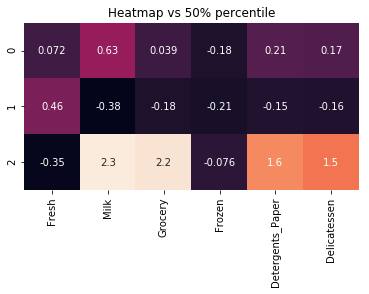

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# TODO：从数据集中选择三个你希望抽样的数据点的索引
indices = [5,27,28]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

plt.axes().set_title("Heatmap vs 50% percentile")
sns.heatmap((samples-data.quantile(q=0.5))/data.std(ddof=0), annot=True, cbar=False, square=True)

### 问题 1
在你看来你选择的这三个样本点分别代表什么类型的企业（客户）？对每一个你选择的样本客户，通过它在每一种产品类型上的花费与数据集的统计描述进行比较，给出你做上述判断的理由。


**提示：** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

**回答:**

用户1:从热度图上个看,这个用户的  除了 frozen 都超过了平均值,比较有可能是个饭店
    
用户2:采购的 fresh 超过平均值很多,但是其他商品都远低于平均值,可能是一个个零售商,主要从事 fresh 的销售,
    
用户3:销售的 milk 和Grocery数量远远高于平均值,所以可能是个咖啡馆.

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。有一个简单的方法可以检测相关性：我们用移除了某一个特征之后的数据集来构建一个监督学习（回归）模型，然后用这个模型去预测那个被移除的特征，再对这个预测结果进行评分，看看预测结果如何。

在下面的代码单元中，你需要实现以下的功能：
 - 使用 `DataFrame.drop` 函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给 `new_data` 。
 - 使用 `sklearn.model_selection.train_test_split` 将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置 `test_size` 为 `0.25` 并设置一个 `random_state` 。
 
 
 - 导入一个 DecisionTreeRegressor （决策树回归器），设置一个 `random_state`，然后用训练集训练它。
 - 使用回归器的 `score` 函数输出模型在测试集上的预测得分。

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
key = 'Delicatessen'
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一个特征# TODO： 
new_data = data.drop(key, axis = 1)

# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
X = new_data
y = data[key]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)
# prediction = regressor.predict(X_test)

# # TODO：输出在测试集上的预测得分
score = regressor.score(X_test,y_test)
score

-11.872523401118437

### 问题 2
你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？为什么？  
**提示：** 决定系数（coefficient of determination），$R^2$ 结果在0到1之间，1表示完美拟合，一个负的 $R^2$ 表示模型不能够拟合数据。

**回答:**

- 我选择了"Delicatessen"这个feature, 得分-11.872523401118437,可见这个属性用过其他数据无法预测,所以它是一个非常重要的 feature, 对于预测用户消费习惯非常重要.


- R2的得分越高,显示这个feature 和其他 feature 的相关度越高,反之越低.得分比较高的 feature 可以使用其他 feature 进行预测,所以不是那么重要.


- 对于一个 R2得分很高的 feature 可以考虑丢弃,因为它所包含的信息可以通过其他信息预测出来.

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

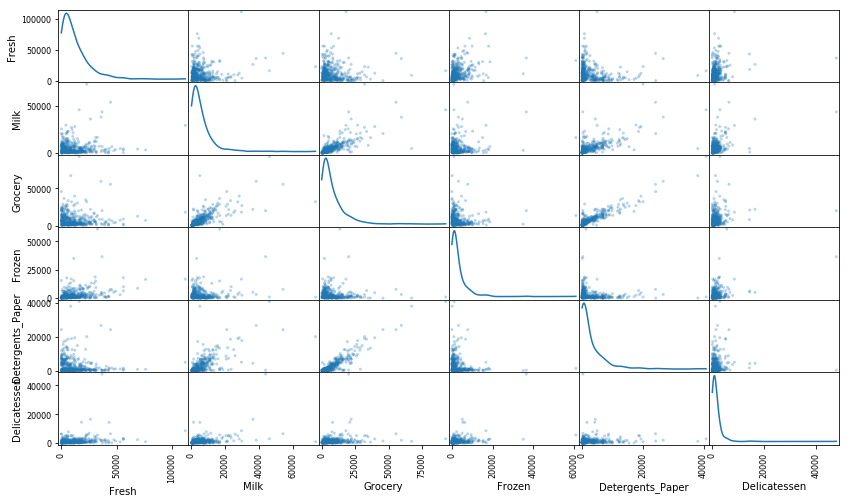

In [8]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 问题 3
这里是否存在一些特征他们彼此之间存在一定程度相关性？如果有请列出。这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？

**提示：** 这些数据是正态分布（normally distributed）的吗？大多数的数据点分布在哪？

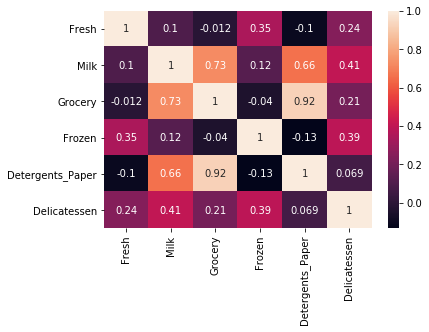

In [9]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

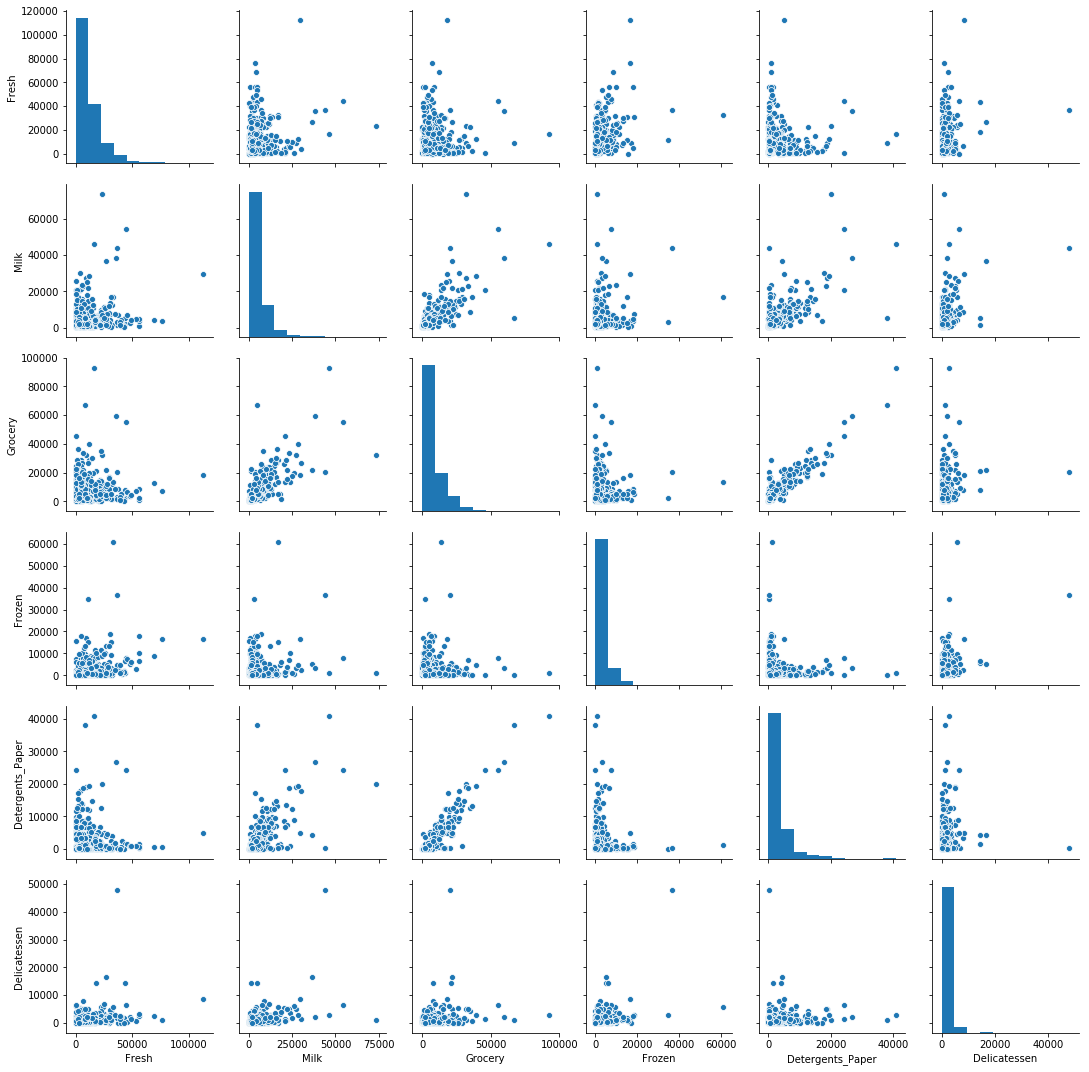

In [10]:
sns.pairplot(data)

**回答:**

从图片和相关系数上看,可以看出下列数据相关性比较高

- Detergents_Paper and Grocery,相关系数达到0.92

- Detergents_Paper and Milk, 相关系数0.66

- Grocery and Milk: 相关系数0.73.

从数据中可以看出,Detergents_Paper是一个不那么重要的属性,因为它和Grocery和Milk都有很高的相关性,所以通过Grocery和Milk来获取它的信息.同时,对于Grocery和Milk这两个属性,也可以考虑只保留一个,因为他们相关性很高.

整体上说,大多数数据都集中在数值比较小的区域,看不出明显正太分布的效果.

## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个[非线性的缩放](https://github.com/czcbangkai/translations/blob/master/use_of_logarithms_in_economics/use_of_logarithms_in_economics.pdf)是很合适的，[（英文原文）](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用 [Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用 `np.log` 函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给 `log_data`。 
 - 使用 `np.log` 函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给 `log_samples`。

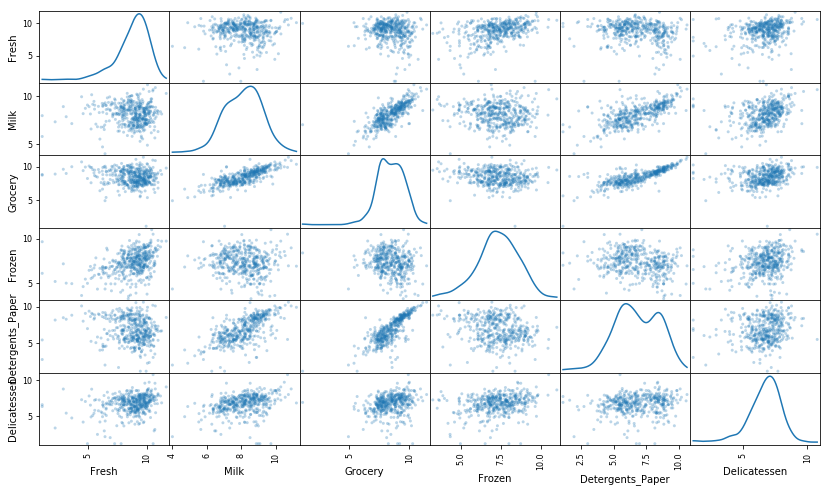

In [6]:
# TODO：使用自然对数缩放数据
log_data = np.log(data)

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples)


# 为每一对新产生的特征制作一个散射矩阵
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

In [7]:
# 展示经过对数变换后的样本数据
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
2,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567


### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[ Tukey 的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个异常阶（outlier step）被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的 IQR 之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的 25th 分位点的值分配给 `Q1` 。使用 `np.percentile` 来完成这个功能。
 - 将指定特征的 75th 分位点的值分配给 `Q3` 。同样的，使用 `np.percentile` 来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给 `step`。
 - 选择性地通过将索引添加到 `outliers` 列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在 `good_data` 中。

In [8]:
# 对于每一个特征，找到值异常高或者是异常低的数据点


all_outliers = np.array([], dtype='int64')


index_list = []
for feature in log_data.keys():

    
    # TODO: 计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: 计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: 使用四分位范围计算异常阶（1.5倍的四分位距）
    step = (Q3 - Q1) * 1.5
    
    # 显示异常点
    print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))

    
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    index = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    index_list.append(index)
    
# TODO(可选): 选择你希望移除的数据点的索引

index_list = np.array(index_list)
index_list_flatten = np.concatenate(index_list)
unique_list = np.unique(index_list_flatten)

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]




print(outliers)




# 以下代码会移除outliers中索引的数据点, 并储存在good_data中
print('there are {} outliers in the data'.format(len(outliers)))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print("New dataset with removed outliers has {} samples with {} features each.".format(good_data.shape[0], good_data.shape[1]))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]
there are 5 outliers in the data
New dataset with removed outliers has 435 samples with 6 features each.


### 问题 4
请列出所有在多于一个特征下被看作是异常的数据点。这些点应该被从数据集中移除吗？为什么？把你认为需要移除的数据点全部加入到到 `outliers` 变量中。

**回答:**

In [59]:
columns = data.columns


for i in range(len(index_list)):
    for j in range(i + 1, len(index_list)):
        a = np.intersect1d(index_list[i], index_list[j])
        if len(a) > 0:
            print('the overlap between', columns[i], 'and', columns[j], 'is', a)

the overlap between Fresh and Frozen is [65]
the overlap between Fresh and Delicatessen is [ 66 128]
the overlap between Milk and Grocery is [154]
the overlap between Milk and Delicatessen is [154]
the overlap between Grocery and Detergents_Paper is [75]
the overlap between Grocery and Delicatessen is [154]


下面这些点在多于一个属性上离群
- 154: 离群点: Delicatessen, Milk and Grocery.
- 128: 离群点: Delicatessen and Fresh.
- 75: 离群点: Detergents_Paper and Grocery.
- 66: 离群点: Delicatessen and Fresh
- 65: 离群点: Frozen and Fresh

数值上这些点在不同属性上的数值不是太大就是太低,数量还太少,和大多数数据相比,他们不会提供太多有价值的信息,还会导致数据整体的倾斜,所以删除他们应该是必要的.




## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在 `good_data` 上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA 也将报告每一个维度的解释方差比（explained variance ratio）--这个数据有多少方差能够用这个单独的维度来解释。注意 PCA 的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入 `sklearn.decomposition.PCA` 并且将 `good_data` 用 PCA 并且使用6个维度进行拟合后的结果保存到 `pca` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储到 `pca_samples` 中。

the first explained variance + the second explained variance =  0.7068172308068137
the sum of the first  4 explained variance =  0.9310901099509614


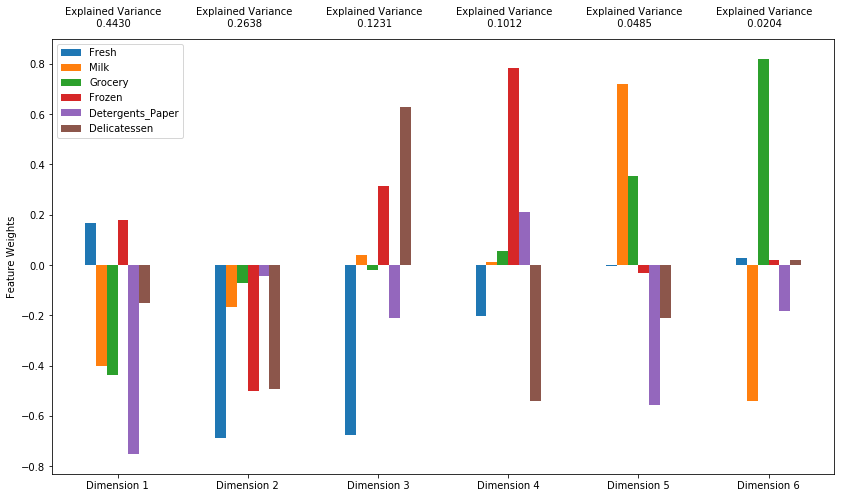

In [60]:
# TODO：通过在good data上进行PCA，将其转换成6个维度
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)
# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(log_samples)

# 生成PCA的结果图
pca_results = vs.pca_results(good_data, pca)

explained_variance_ratio_list = pca.explained_variance_ratio_
print('the first explained variance + the second explained variance = ', explained_variance_ratio_list[0] + explained_variance_ratio_list[1])

print('the sum of the first  4 explained variance = ', 
      explained_variance_ratio_list[0] + explained_variance_ratio_list[1] + explained_variance_ratio_list[2] + explained_variance_ratio_list[3])



### 问题 5
数据的第一个和第二个主成分**总共**表示了多少的方差？ 前四个主成分呢？使用上面提供的可视化图像，从用户花费的角度来讨论前四个主要成分中每个主成分代表的消费行为并给出你做出判断的理由。

**提示：**
* 对每个主成分中的特征分析权重的正负和大小。
* 结合每个主成分权重的正负讨论消费行为。
* 某一特定维度上的正向增长对应正权特征的增长和负权特征的减少。增长和减少的速率和每个特征的权重相关。[参考资料：Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54)

**回答:**

- 第一和第二成分代表的方差:0.7252529048663602


- 前4个成分的方差:0.927953605230786

- 对于这个图中的纵轴,实际上是各个原始 feature 在这个维度上投影的比例,如果这个 feature 和这个维度垂直,则对应的 weight 值应该为0.如果系数为一个很大的正数,则表示这个 feature 在这个维度上投影也是一个比较大的正数;如果这个系数是负数,则表示这个 feature 在这个维度上投影的绝对值很大,但是却投影到了这个维度的负方向,所以系数是负数.总之,只要系数的绝对值很大,就意味着这个 维度可以很好的保留这个 feature 的信息.

- PCA后的每一个主要成分，是由原数据各个特征加上不同比重构成的。首要成分是最能够解释原数据的方差的，也就是所谓的explained variance。举例来说，在这个项目中，第一个主要成分在Detergents_Paper, Grocery和Milk上有很大的比重，并且解释了最多的方差。排除掉第一个主要成分（及其所解释的方差），第二个主要成份解释了最多的剩余的方差。以此类推，第三个成分是在排除了第二个成分的基础上，最能够解释剩余方差的。

- 对于PCA主成分的分析，通常我们更关心的，是feature weight的绝对大小, 但是第三和第四维度的存在一些相对比重很高但是符号相反的权重（比如第三维的Fresh与Delicatessen），它们表示了一种负相关的关系。比如对于第三维度来说，如果用客户购买很多Fresh， 那么这个客户就会购买很少的Delicatessen。反之也成立：如果客户购买很多Delicatessen，那么Fresh的购买就会减小。
    
- 第一个维度上 Detergents_paper, Grocery, Milk 都于很高的系数,意味着他们和这个维度有很高的相关系数.所以这个维度可以很好保留这三个维度的信息.feature 在这个维度上有很大的 variance.


- 第二个维度上, Fresh, Frozen 和 Delicatessen 右很高的系数,也就是这个维度上着三个 feature 有很大的 variance. 所以这个维度可以很好的保留这三个维度的信息.


- 第三个维度上, Fresh 和 Delicatessen 右很高的系数,虽然 Fresh 的系数是负数,但是这只是意味着在这个维度上 fresh 的投影方向是在该维度的负方向,也就是他们的相关系数是负数,但仍然有很大的相关性.所以Fresh 和 Delicatessen都在这个维度上有比较大的 variance.


- 第四个维度上,Delicatessen有比较高的正系数, Frozen 的系数是比较高的负数,和上面的分析一致,这两个 feature 也可以在这个维度上有很大的 varience.

### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [61]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0850,-0.3243,-0.2635,-0.8812,0.1862,-0.5347
1,2.4162,0.6069,-0.7652,-1.3209,0.1614,0.8089
2,-3.5695,-0.9977,0.9477,-0.5400,0.2579,0.0323


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，**累计解释方差比（cumulative explained variance ratio）**对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将 `good_data` 用两个维度的PCA进行拟合，并将结果存储到 `pca` 中去。
 - 使用 `pca.transform` 将 `good_data` 进行转换，并将结果存储在 `reduced_data` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储在 `pca_samples` 中。

In [62]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
pca = PCA(n_components = 2).fit(good_data)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.transform(good_data)

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


### 观察
运行以下代码观察当仅仅使用两个维度进行 PCA 转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的 PCA 转换相比较时，前两维的数值是保持不变的。

In [63]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0850,-0.3243
1,2.4162,0.6069
2,-3.5695,-0.9977


## 可视化一个双标图（Biplot）
双标图是一个散点图，每个数据点的位置由它所在主成分的分数确定。坐标系是主成分（这里是 `Dimension 1` 和 `Dimension 2`）。此外，双标图还展示出初始特征在主成分上的投影。一个双标图可以帮助我们理解降维后的数据，发现主成分和初始特征之间的关系。

运行下面的代码来创建一个降维后数据的双标图。

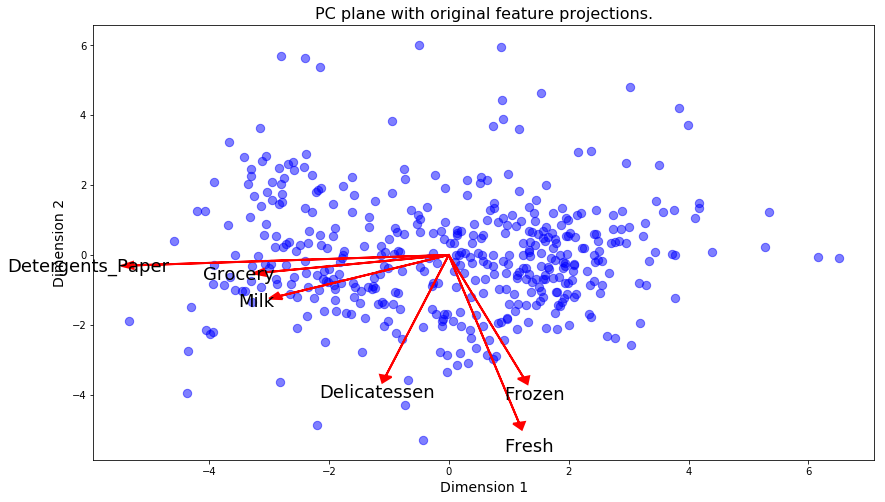

In [64]:
# 可视化双标图
vs.biplot(good_data, reduced_data, pca)

# pca_results = vs.pca_results(good_data, pca)

### 观察

一旦我们有了原始特征的投影（红色箭头），就能更加容易的理解散点图每个数据点的相对位置。

在这个双标图中，哪些初始特征与第一个主成分有强关联？哪些初始特征与第二个主成分相关联？你观察到的是否与之前得到的 pca_results 图相符？

## 聚类

在这个部分，你讲选择使用 K-Means 聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
使用 K-Means 聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？

**回答:**
K-Means的优点:
- 速度快,如果数据量比较大,可以比较快的得到结果.

- 在圆形或者超圆形数据上表现比较好.

K-Means的缺点:

- 容易得到局部最优解

- 对非圆形分布的数据效果不佳.

GNN 的优点:

- 它可以得到每个点属于某个类的概率,而不是像 kmeans 直接给出所有点的分类结果.

- 可以试用于不同形状的数据分布,而不是像 kmeans 一样只适用于圆形分布的数据.

GNN 的缺点:

- 计算效率相对比较低.

在这里,由于我们不清楚数据的分布是否是圆形,我倾向于使用 GNN. 因为它对不同形状的数据都可以很好的工作.不过这里我还是使用两种方法进行分类.

### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

在接下来的代码单元中，你将实现下列功能：
 - 在 `reduced_data` 上使用一个聚类算法，并将结果赋值到 `clusterer`，需要设置  `random_state` 使得结果可以复现。
 - 使用 `clusterer.predict` 预测 `reduced_data` 中的每一个点的簇，并将结果赋值到 `preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到 `centers`。
 - 预测 `pca_samples` 中的每一个样本点的类别并将结果赋值到 `sample_preds`。
 - 导入 `sklearn.metrics.silhouette_score` 包并计算 `reduced_data` 相对于 `preds` 的轮廓系数。
   - 将轮廓系数赋值给 `score` 并输出结果。

## Kmeans

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def cluster_kmeans(data, n_clusters):
    # TODO：在降维后的数据上使用你选择的聚类算法
    clusterer = KMeans(n_clusters = n_clusters, random_state=0).fit(data)
    # TODO：预测每一个点的簇
    preds = clusterer.predict(data)
    # TODO：找到聚类中心
    centers = clusterer.cluster_centers_
    # TODO：预测在每一个转换后的样本点的类
    sample_preds = clusterer.predict(pca_samples)
    # TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
    score = silhouette_score(data, preds)
    return score, preds, centers, sample_preds

for n_clusters in range(2,11):
    score, preds, centers, sample_preds = cluster_kmeans(reduced_data, n_clusters)
    print('KMeans n = {}, score = {}'.format(n_clusters, score))
    

KMeans n = 2, score = 0.42628101546910835
KMeans n = 3, score = 0.39689092644980506
KMeans n = 4, score = 0.3320095826820278
KMeans n = 5, score = 0.3509907789312651
KMeans n = 6, score = 0.3666089873432108
KMeans n = 7, score = 0.363315403844963
KMeans n = 8, score = 0.35099406993457966
KMeans n = 9, score = 0.3541410898467623
KMeans n = 10, score = 0.3510037480942147


## GMM

In [67]:
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
def cluster_GMM(data, n_clusters):
    # TODO：在降维后的数据上使用你选择的聚类算法
    clusterer = GaussianMixture(n_components = n_clusters, random_state=0).fit(data)

    # TODO：预测每一个点的簇
    preds = clusterer.predict(data)

    # TODO：找到聚类中心
    centers = clusterer.means_

    # TODO：预测在每一个转换后的样本点的类
    sample_preds = clusterer.predict(pca_samples)

    # TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
    score = silhouette_score(data, preds)
    return score, preds, centers, sample_preds

for n_clusters in range(2,11):
    score, preds, centers, sample_preds = cluster_GMM(reduced_data, n_clusters)
    print('KMeans n = {}, score = {}'.format(n_clusters, score))


KMeans n = 2, score = 0.42191684646261485
KMeans n = 3, score = 0.3742018475403217
KMeans n = 4, score = 0.329080466700356
KMeans n = 5, score = 0.30587455287316034
KMeans n = 6, score = 0.22481518153271668
KMeans n = 7, score = 0.27433381348916297
KMeans n = 8, score = 0.3443700570270379
KMeans n = 9, score = 0.33432388536275254
KMeans n = 10, score = 0.34063165530453815


### 问题 7

汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？

**回答:**
在这里分别使用 KMeans 和 GMM 两种方法,并且n_clusters = 2---10. 最终两个算法都在n_clusters=2取得了最大的轮廓系数,而且值都在0.44左右.所以我会选择聚类数目为2.

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

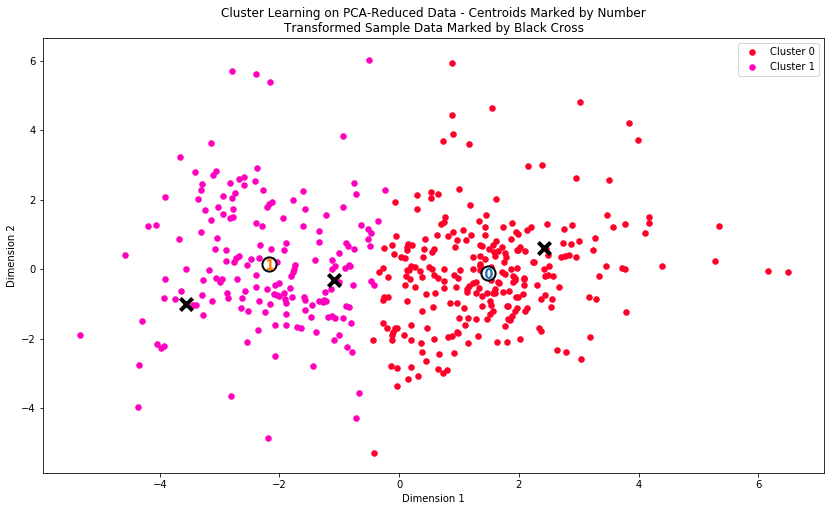

In [68]:
# 从已有的实现中展示聚类的结果
best_cluster_num = 2
score, preds, centers, sample_preds = cluster_kmeans(reduced_data, best_cluster_num)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的平均。对于创建客户分类的问题，一个簇的中心对应于那个分类的平均用户。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用 `pca.inverse_transform` 将 `centers` 反向转换，并将结果存储在 `log_centers` 中。
 - 使用 `np.log` 的反函数 `np.exp` 反向转换 `log_centers` 并将结果存储到 `true_centers` 中。


这一步实际上是把两个中心点从二维恢复到6维的原始数据.

In [69]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [70]:
display(true_centers - data.mean()) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455
Segment 1,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455


In [71]:
display(true_centers - data.median()) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5
Segment 1,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5


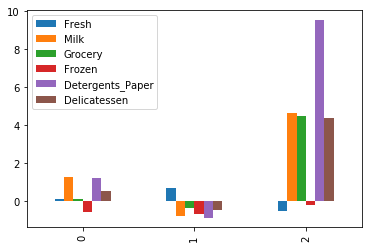

In [10]:
benchmark = data.median()  # or median etc.
((samples-benchmark) / benchmark).plot.bar()

### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，你认为这些客户分类代表了哪类客户？为什么？需要参考在项目最开始得到的统计值来给出理由。

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

**回答:**
为了方便分析数据,我把中心点分别和所有数据的平均值和中位数进行比较.考虑到平局值容易受到离群点的影响.所以我这里放弃平均值,只比较中心点和中位数的比较.

- Segment 0: 明显购买了远超过中位数的Fresh和Frozen,所以这极有可能是销售 fresh 和 frozen 的零售商或者饭店.

- Segment 1: 明显购买了远唱过中位数的Milk,Detergents_Paper和Grocery,所以这极有可能是一个超市或者咖啡店.

### 问题 9
对于每一个样本点**问题 8 **中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [72]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [73]:
display(samples - data.median()) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,909.0,4632.0,370.5,-860.0,978.5,485.5
1,5772.0,-2824.0,-1710.5,-1041.0,-716.5,-447.5
2,-4391.0,16857.0,21201.5,-368.0,7787.5,4240.5


**回答:**

- sample 0,2: 购买了超过中位数的Milk,Grocery和Detergents_Paper,根据之前的分析,明显属于 segment 1.

- sample 1:  购买了超过中位数的Fresh,尽管其他都很低,但是大致上说,是 segment 0

和之前的预期大致一致.之前以为他们会被分成3类.

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用 [A/B tests ](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？你需要给出在这个情形下A/B 测试具体的实现方法，以及最终得出结论的依据是什么？

**提示：** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于哪个类型的客户影响最大？

**回答：**

我们可以分别从 segment 0 和 1两组中随机抽取n 个用户,然后对于每组用户都取一半用户采用新的服务策略,另外一半保持不变.在这样执行了一段时间以后调查这四组用户的反馈,然后就可以决定这个新策略具体适合于在那个 cluster 里实施.

### 问题 11
通过聚类技术，我们能够将原有的没有标记的数据集中的附加结构分析出来。因为每一个客户都有一个最佳的划分（取决于你选择使用的聚类算法），我们可以把用户分类作为数据的一个[工程特征](https://en.wikipedia.org/wiki/Feature_learning#Unsupervised_feature_learning)。假设批发商最近迎来十位新顾客，并且他已经为每位顾客每个产品类别年度采购额进行了预估。进行了这些估算之后，批发商该如何运用它的预估和非监督学习的结果来对这十个新的客户进行更好的预测？

**提示**：在下面的代码单元中，我们提供了一个已经做好聚类的数据（聚类结果为数据中的cluster属性），我们将在这个数据集上做一个小实验。尝试运行下面的代码看看我们尝试预测‘Region’的时候，如果存在聚类特征'cluster'与不存在相比对最终的得分会有什么影响？这对你有什么启发？

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 读取包含聚类结果的数据
cluster_data = pd.read_csv("cluster.csv")
y = cluster_data['Region']
X = cluster_data.drop(['Region'], axis = 1)

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

clf = RandomForestClassifier(random_state=24)
clf.fit(X_train, y_train)
score_with_cluster = clf.score(X_test, y_test)

# 移除cluster特征
X_train = X_train.copy()
X_train.drop(['cluster'], axis=1, inplace=True)
X_test = X_test.copy()
X_test.drop(['cluster'], axis=1, inplace=True)
clf.fit(X_train, y_train)
score_no_cluster = clf.score(X_test, y_test)

print("不使用cluster特征的得分: %.4f"%score_no_cluster)
print("使用cluster特征的得分: %.4f"%score_with_cluster)
cluster_data.head()

不使用cluster特征的得分: 0.6437
使用cluster特征的得分: 0.6667


/Users/cjz/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
0,3,12669,9656,7561,214,2674,1338,1
1,3,7057,9810,9568,1762,3293,1776,1
2,3,6353,8808,7684,2405,3516,7844,1
3,3,13265,1196,4221,6404,507,1788,0
4,3,22615,5410,7198,3915,1777,5185,1


**回答：**
首先,这是一个监督学习,很多监督学习的算法都可以被用来做这个工作,除了上面给出的random forest,adaboost, svm, logistic regression 和朴素贝叶斯都可以被用来预测region.

我们还可以考虑结合cluster,计算几个新的点和不同 region 中所有点的平均距离来判断这个点属于那个 region

从结果上看,利用了 cluster 特征的预测结果过要高大约1个百分点,这意味着 cluster 特征能够为 region 的预测提供额外的信息.

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除 `'Channel'` 和 `'Region'` 特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入 `Channel` 这个特征到数据集中，并施加和原来数据集同样的 PCA 变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为 `'HoReCa'` (旅馆/餐馆/咖啡厅)或者 `'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

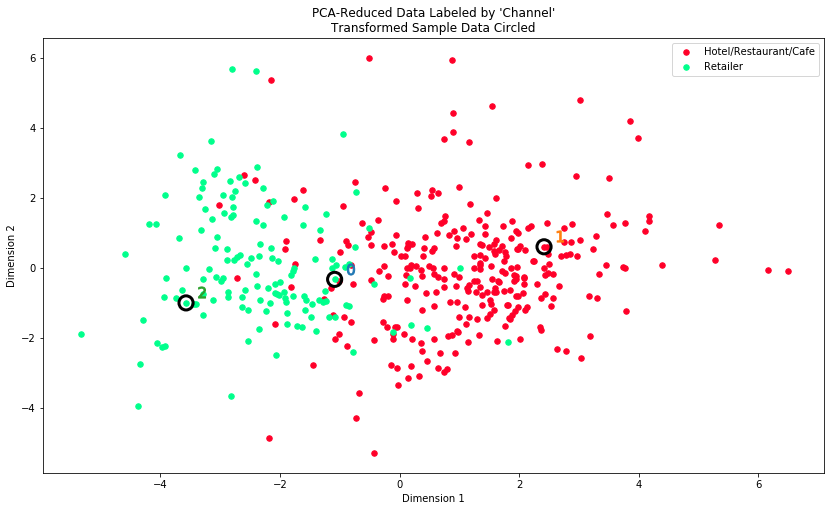

In [75]:
# 根据‘Channel‘数据显示聚类的结果
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

你选择的聚类算法和聚类点的数目，与内在的旅馆/餐馆/咖啡店和零售商的分布相比，有足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'？你觉得这个分类和前面你对于用户分类的定义是一致的吗？

**回答：**

从结果上,数据大致被分成2类,所以我们的 cluster_n=2是合理的. 对于两个cluster 而言,红色区域左侧和蓝色区域右侧都基本属于所分的类别,但是在中间区域有很多数据是混在一起的,无法使用聚类进行有效的区分.

整体上说,我们的分类结果结果是可以接受的.

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  